In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from datetime import timedelta
from timeit import default_timer as timer
from math import sqrt

## Images reading&resizing

In [2]:
img_l = np.asanyarray(Image.open("i1.jpg").resize((400,300), Image.BICUBIC).convert("RGB")).astype(np.int)
img_r = np.asanyarray(Image.open("i2.jpg").resize((400,300), Image.BICUBIC).convert("RGB")).astype(np.int)

## Params definition

In [3]:
kg_max=45
kv_max=14
kv_half = kv_max//2
height = img_r.shape[0]
length = img_r.shape[1]

In [13]:
#import shelve

In [14]:
#with shelve.open("lab2.db") as db:
    #db["img_shift2"] = img_shift2
    #img_shift2 = db["img_shift2"]

In [16]:
#np.save("img_shift.npy", img_shift2)

In [4]:
img_shift2 = np.load("img_shift.npy")

# lab2 start

https://staff.fnwi.uva.nl/l.dorst/hz/chap11_13.pdf

In [5]:
from random import choices
from scipy.linalg import null_space

In [6]:
pairs = []
# (X, X')
for y in range(30, img_r.shape[0] - 30):
    for x in range(30, img_r.shape[1] - 30):
        x_norm = [x, y, 1]
        dot_shift = img_shift2[y, x]
        x2 = int(x + dot_shift[0])
        y2 = int(y + dot_shift[1] - kv_half)
        x_strich = [x2, y2, 1]
        pairs.append([x_norm, x_strich])

In [96]:
Boundary = 0.0001
bestF = None
bestScore = 0

for iteration in range(10000):
    print(iteration, end=" ")
    seven_pairs = choices(pairs, k=7)
    X_big = []
    for a,b in seven_pairs:
        x1, y1, z1 = a
        x2, y2, z2 = b
        X_big.append([x2*x1, x2*y1, x2*z1, y2*x1, y2*y1, y2*z1, z2*x1, z2*y1, z2*z1])
        # на попередній лінії була помилка,
        # через яку я декілька тижнів не міг зрозуміти чого не працює.
        # вічна пам'ять моїм загиблим нервовим клітинам.
        # F
    X_big = np.array(X_big)
    null_vectors = null_space(X_big)
    f1 = null_vectors[:,0].reshape((3,3))
    f2 = null_vectors[:,1].reshape((3,3))
    
    p = np.array([np.linalg.det(f2),
     np.linalg.det(f2)*np.trace(np.dot(np.linalg.inv(f2), f1)),
     np.linalg.det(f1)*np.trace(np.dot(np.linalg.inv(f1), f2)),
     np.linalg.det(f2),
    ])
    coefs = np.roots(p)
    for i in coefs[:1]:
        if np.iscomplex(i):
            continue
        F = f1+i*f2
        # both matrix have zero det
        a = np.array([i[0] for i in pairs])
        b = np.array([i[1] for i in pairs])
        score = np.sum(np.einsum('ki,ij,kj->k', a, F, b) < Boundary)
        if score > bestScore:
            bestScore = score
            bestF = F.copy()
            print("hit", bestScore/len(pairs))

0 hit 0.19295343137254903
1 hit 0.695514705882353
2 3 4 hit 0.9974632352941176
5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 hit 1.0
130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 2

KeyboardInterrupt: 

## Фундаментальна матриця

In [97]:
np.round(bestF, 1)

array([[  0. ,  -0. ,   2.8],
       [  0. ,   0. ,  -1.9],
       [ -2.8,   1.9, -23.5]])

In [98]:
bestF

array([[ 7.87934238e-05, -3.16743815e-04,  2.84767813e+00],
       [ 1.37019897e-04,  7.40824127e-05, -1.92565200e+00],
       [-2.83804859e+00,  1.91090473e+00, -2.34758743e+01]])

In [107]:
#np.save("bestF.npy", bestF)
#np.save("bestScore.npy", bestScore)

In [21]:
bestF = np.load("bestF.npy")
bestScore = np.load("bestScore.npy")

In [19]:
#with shelve.open("lab2.db") as db:
#    #db["bestF"] = bestF
#    #db["bestScore"] = bestScore
#    bestF = db["bestF"]
#    bestScore = db["bestScore"]
#    #img_shift2 = db["img_shift2"]

## Відсоток точок, які задовольняють умову до фундаментальної матриці

In [99]:
print(round(100*bestScore/len(pairs), 2),"%")

100.0 %


## Епіполярна точка у 3-х координатах

In [100]:
epipole = null_space(bestF, 1e-3)
epipole = epipole/epipole[-1]
epipole

array([[7.41986897e+03],
       [1.10321694e+04],
       [1.00000000e+00]])

In [101]:
np.linalg.det(bestF)

-9.791544359547874e-05

In [102]:
epipole_strich = [epipole[0,0], epipole[1,0]]

## Епіполярна точка

In [103]:
print("X:", epipole_strich[0])
print("Y:", epipole_strich[1])

X: 7419.8689742920515
Y: 11032.16935796511


## Ліве зображення

In [104]:
from PIL import ImageDraw

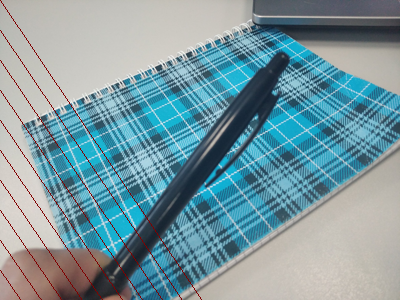

In [105]:
image2show = Image.open("i1.jpg").resize((400,300), Image.BICUBIC).convert("RGB")
draw = ImageDraw.Draw(image2show)
for i in range(11):
    draw.line((0, i*30, epipole_strich[0], epipole_strich[1]), fill=128)
image2show

## Праве зображення

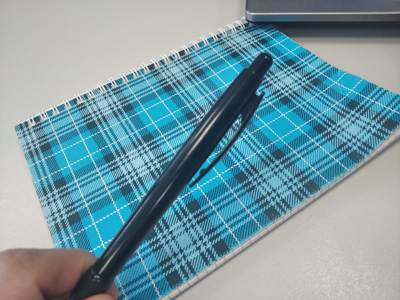

In [106]:
Image.open("i2.jpg").resize((400,300), Image.BICUBIC).convert("RGB")